Assignment-3

Aakash Loyar

In [710]:
#installing and importing important library
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In this assignment you will implement a simple Artificial Neural Network (ANN) from scratch (i.e.,
without using built-in functions). Implement the back-propagation algorithm to learn the weights of an
ANN with 2 input nodes, 2 hidden nodes and 1 output node. The hidden layer nodes employ a sigmoid
nonlinearity. Use squared-error loss. Train your network to learn the following binary operations:

1. XOR (10)
2. AND (10)
3. OR (10)

Since the output is binary (and scalar), choose your gk

(·) appropriately. Your code should make the number
of nodes a configurable parameter. To generate the dataset, perturb the input binary digits with a small
amount of Gaussian noise. Use 80% of the dataset for training and the rest for testing. Report the following:
1. Training and testing loss over training iterations. Plot these values.
2. Training and testing accuracy over training iterations. Plot these values.
3. Print the training and test loss and accuracy at the end of training.
4. Deterministic Gradient Descent: Experiment with the number of training samples n and see how it
affects performance. In other words, repeat the training and testing for three different choices of n.
5. Stochastic Gradient Descent: Experiment with the batch size m (for a fixed n) and see how it affects
performance. In other words, repeat the training and testing for three different choices of m.

In [711]:
#now here we will declare size of neural netork
#hidden size=3, input size=2,output size=1
# np.random.seed(29)
#size of network
P=2
M=3
K=1


iterations=500
#patch size for SGD
patch_size=30


In [712]:
#in this shell we initialize the input with gaussian noise and corresponding output for each operation
def gen_data(operation,size):
    noise=0.1
    X=np.array([[0,0],[0,1],[1,0],[1,1]])
    if operation=="XOR":
        Y=np.array([[0],[1],[1],[0]])
    elif operation=="AND":
        Y= np.array([[0],[0],[0],[1]])
    elif operation=="OR":
        Y=np.array([[0],[1],[1],[1]])
    else:
        raise ValueError("Wrong Operation")
    
    X_gen,Y_gen=[],[]
    for i in range(0,size):
        ind=np.random.randint(0,4)
        x=X[ind][0]+np.random.rand()*noise
        y=X[ind][1]+np.random.rand()*noise
        temp=[]
        temp.append(x)
        temp.append(y)
        X_gen.append(temp)
        Y_gen.append([Y[ind]])
    X_gen=np.array(X_gen)
    Y_gen=np.array(Y_gen)    
    return X_gen,Y_gen


In [713]:
#now here we are declaring sigmoid function
# sigmoid(x)=1/(1+e**(-1))
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [714]:
#now here this function will give sigmoid derivative
def der_sigmoid(x):
    s = sigmoid(x)
    return (1-s)*s

In [715]:
# now here is our loss function
#now here we have mean of (y-yhat)**2 mean
def Loss(Y,Y_hat):
    sum=0
    for i in range(0,len(Y)):
        for k in range(0,K):
            sum+=(Y[i][k]-Y_hat[i][k])**2
    sum/=len(Y)
    return sum

In [716]:
#function to calculate accuracy -> correct output/total ouptput
def Accuracy(Y, Y_hat):
        c=0
        for i in range(0,len(Y)):
            Y_round=np.round(Y_hat[i][0])
            if Y_round==Y[i][0]:
                c=c+1
        return c/len(Y)        

In [717]:
# now in shell we will divide our input in test and training-> in 20%:80% -> nearly 1:3
# this one is the function that give use 4 outputs-> X_train,Y_train, X_test,Y_test
def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    return X_train,Y_train,X_test,Y_test
     

In [718]:
# now here in this shell we will declare our ANN
class ANN:

    #function init our ANN with eta as learning rate ->0.1
    def __init__(ann):
        # step1-> we have 3 hidden layer here and 2 input layer so here we will have alpha matrix of size 3*2
        # step-> beta matrix 1*3
        ann.alpha=np.random.rand(M,P)
        ann.beta=np.random.rand(K,M)

        ann.eta=0.01
    
    #function give yhat
    def yhat(ann,X_i):
        #step1-> we have to first get z
        z=np.dot(X_i,ann.alpha.T)# 1*p with m*p|p*m-> 1*m
        # so here z is 1*m
        #step2-> apply sigmoid
        z=sigmoid(z)
        #step->3 we have to get yhat
        # 1*m with k*m-> take transpose to make m*k
        yhat=np.dot(z,ann.beta.T)
        #giving us a 1*k
        #step->4 apply sigmoid
        yhat=sigmoid(yhat)
        # print(yhat.shape)
        #yhat is a 1*1 list
        return yhat
    
    #function give array of yhat
    def output_array(ann,X):
        Y_hat=[]
        for i in range(len(X)):
            y=ann.yhat(X[i])
            Y_hat.append(y)
        Y_hat=np.array(Y_hat)        
        return Y_hat    

    def func1(ann,X_i,m):#-> return integer
        # now here we have X of 1*p
        #ann.alpha[m]-> is 1*p
        # print(X_i.shape)
        # print(ann.alpha[m].T.shape)
        arr=np.dot(X_i,ann.alpha[m].T)#-> gives a scalar
        #arr is 1*1 arr
        # print(arr)
        return arr

    def beta_gradient(ann,X,Y,Y_hat,i,k,m):
        res=-2*(Y[i][k]-Y_hat[i][k])*der_sigmoid(ann.beta[k][m]*ann.func1(X[i],m))*ann.func1(X[i],m)
        return res
    
    #beta(k.z) z=np.dot(X(1*p),ann.alpha(m*p).T->1*m   ann.beta[k](1*m).T
    def func2(ann,X_i,k):
        # here X_i is (P) and alpha is (M,P)|(P,M)
        z=np.dot(X_i,ann.alpha.T)
        y=np.dot(z,ann.beta[k])
        return y
    
    def func3(ann,X_i,m):
        z=np.dot(X_i,ann.alpha[m])
        return z
    

    def alpha_gradient(ann,X,Y,Y_hat,i,k,m,p):
        res=-2*(Y[i][k]-Y_hat[i][k])*der_sigmoid(ann.func2(X[i],k))*ann.beta[k][m]*der_sigmoid(ann.func3(X[i],m))*X[i][p]
        return res

    def update(ann,X,Y,Y_hat):
        n=len(X)
        alpha=np.zeros((M,P))
        beta=np.zeros((K,M))
        for k in range(0,K):
            for m in range(0,M):
                gradsum=0
                for i in range(0,n):
                    gradsum+=ann.beta_gradient(X,Y,Y_hat,i,k,m)
                gradsum/=n
                beta[k][m]=ann.beta[k][m]-ann.eta*gradsum

        for m in range(0,M):
            for p in range(0,P):
                gradsum=0
                for i in range(0,n):
                    for k in range(0,K):
                        gradsum+=ann.alpha_gradient(X,Y,Y_hat,i,k,m,p)
                gradsum/=n
                alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum

        # print(ann.alpha)
        # print(ann.beta)        
        # print("gap")
        ann.alpha=np.array(alpha)
        ann.beta=np.array(beta)
        
        # print(ann.alpha)
        # print(ann.beta)

In [719]:
# now here we will train our model-> using Gradient Descent
def train_GD(operation,size):

    #generating data
    X,Y=gen_data(operation,size)
    # print(f'X={X}')
    # print(f'Y={Y}')
    #splitting data
    X_train,Y_train,X_test,Y_test=split_data(X,Y)
    # print(f'X={X_train}')
    # print(f'Y={Y_train}')
    
    # print(f'X={X_test}')
    # print(f'Y={Y_test}')

    #declaring loss and accuracy arrays
    loss_train,accuracy_train,loss_test,accuracy_test=[],[],[],[]
    
    #initialising ann
    ann1=ANN()
    for i in range(iterations):


        #Now Training Data
        #Output for training data
        Y_hat_train=ann1.output_array(X_train)
        # print(Y_hat_train)
        #loss for training data
        loss=Loss(Y_train,Y_hat_train)

        #accuracy for training data
        accuracy=Accuracy(Y_train,Y_hat_train)

        #appending in res array
        loss_train.append(loss)
        accuracy_train.append(accuracy)

        #Now test data
        #Output for test data
        Y_hat_test=ann1.output_array(X_test)

        #loss for test data
        loss=Loss(Y_test,Y_hat_test)


        #accuracy for test data
        accuracy=Accuracy(Y_test,Y_hat_test)
        
        #appending in the res array
        loss_test.append(loss)
        accuracy_test.append(accuracy)

        # print(Y_hat_train)
        # print(f'X={xor_accuracy_train}')

        #now moving forward-> updating our parameters
        ann1.update(X_train,Y_train,Y_hat_train)
        

    return loss_train,accuracy_train,loss_test,accuracy_test



    

In [720]:
#this function gives a random data from generated data fro stochastic data
def patch(X,Y):
    X_patch = X[np.random.choice(X.shape[0], patch_size, replace=False)]
    Y_patch = Y[np.random.choice(Y.shape[0], patch_size, replace=False)]
    return X_patch,Y_patch

In [721]:
# now here we will train our model-> using stochastic Gradient Descent
def train_SGD(operation,size):

    #generating data
    X,Y=gen_data(operation,size)
    # print(f'X={X}')
    # print(f'Y={Y}')
    #splitting data
    
    # print(f'X={X_train}')
    # print(f'Y={Y_train}')
    
    # print(f'X={X_test}')
    # print(f'Y={Y_test}')

    #declaring loss and accuracy arrays
    loss_train,accuracy_train,loss_test,accuracy_test=[],[],[],[]
    
    #initialising ann
    ann1=ANN()
    for epoch in range(iterations):

        X_patch,Y_patch=patch(X,Y)

        X_train,Y_train,X_test,Y_test=split_data(X_patch,Y_patch)
        
        #Now Training Data
        #Output for training data
        Y_hat_train=ann1.output_array(X_train)
        # print(Y_hat_train)
        #loss for training data
        loss=Loss(Y_train,Y_hat_train)

        #accuracy for training data
        accuracy=Accuracy(Y_train,Y_hat_train)

        #appending in res array
        loss_train.append(loss)
        accuracy_train.append(accuracy)

        #Now test data
        #Output for test data
        Y_hat_test=ann1.output_array(X_test)

        #loss for test data
        loss=Loss(Y_test,Y_hat_test)


        #accuracy for test data
        accuracy=Accuracy(Y_test,Y_hat_test)
        
        #appending in the res array
        loss_test.append(loss)
        accuracy_test.append(accuracy)

        # print(Y_hat_train)
        # print(f'X={xor_accuracy_train}')

        #now moving forward-> updating our parameters
        ann1.update(X_train,Y_train,Y_hat_train)
        

    return loss_train,accuracy_train,loss_test,accuracy_test


In [722]:
def graph(title,data_size,operation,type,y):
    x = np.arange(1, len(y)+1)
    plt.scatter(x,y,label=f'data_size={data_size}')
    plt.plot(x,y)
    plt.xlabel("No. of iterations")
    plt.ylabel(type)
    plt.title(f"{title} using {operation}")
    plt.legend()
    plt.show()

In [723]:
def model_GD(operation,data_size):
    loss_train,accuracy_train,loss_test,accuracy_test=train_GD(operation,data_size)
    # print(f'Loss_train={loss_train}')
    # print(f'Loss_train={accuracy_train}')
    # print(f'Loss_train={loss_test}')
    # print(f'Loss_train={accuracy_test}')
    graph(operation,data_size,"GD","Training loss",loss_train)
    graph(operation,data_size,"GD","Training accuracy",accuracy_train)
    graph(operation,data_size,"GD","Test loss",loss_test)
    graph(operation,data_size,"GD","Test accuracy",accuracy_test)

In [724]:
def model_SGD(operation,data_size):
    loss_train,accuracy_train,loss_test,accuracy_test=train_SGD(operation,data_size)
    # print(f'Loss_train={loss_train}')
    # print(f'Loss_train={accuracy_train}')
    # print(f'Loss_train={loss_test}')
    # print(f'Loss_train={accuracy_test}')
    graph(operation,data_size,"SGD","Training loss",loss_train)
    graph(operation,data_size,"SGD","Training accuracy",accuracy_train)
    graph(operation,data_size,"SGD","Test loss",loss_test)
    graph(operation,data_size,"SGD","Test accuracy",accuracy_test)

/tmp/ipykernel_5815/668176808.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[k][m]=ann.beta[k][m]-ann.eta*gradsum
/tmp/ipykernel_5815/668176808.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum


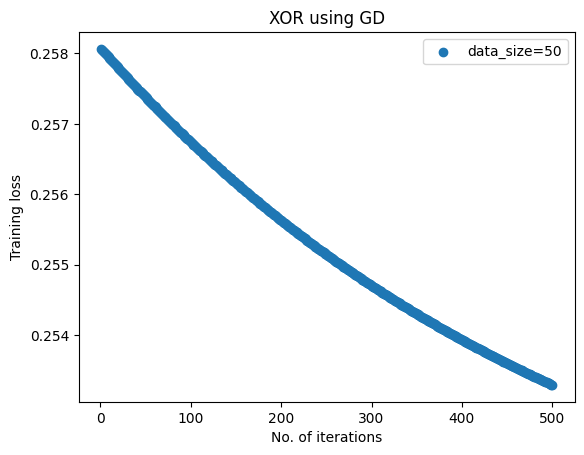

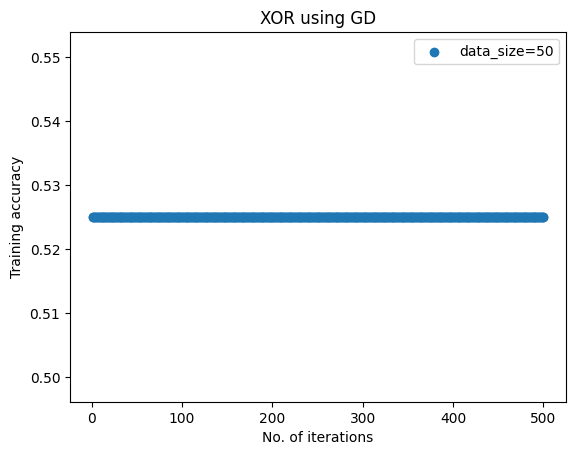

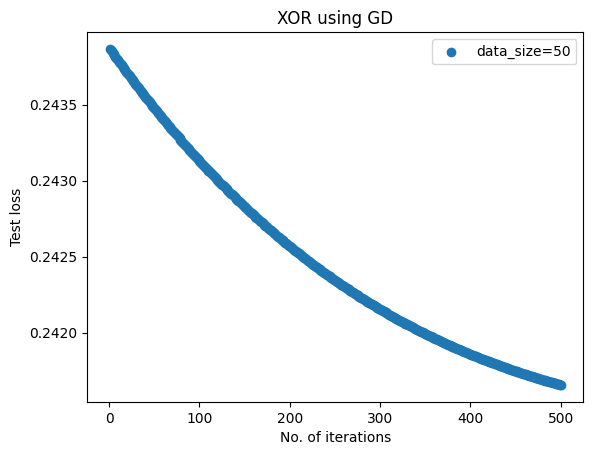

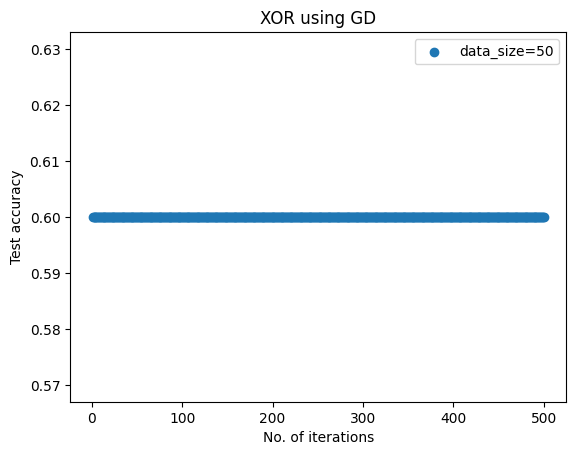

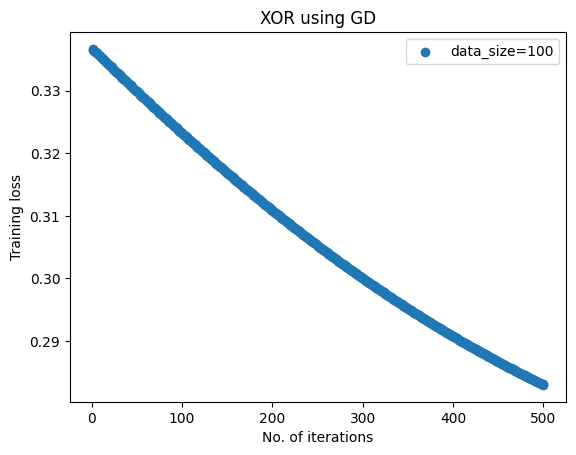

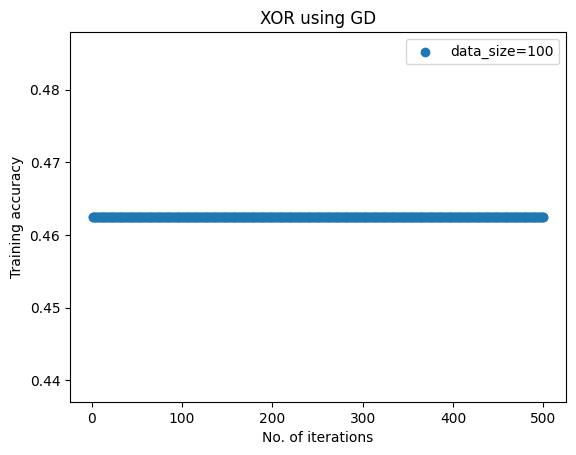

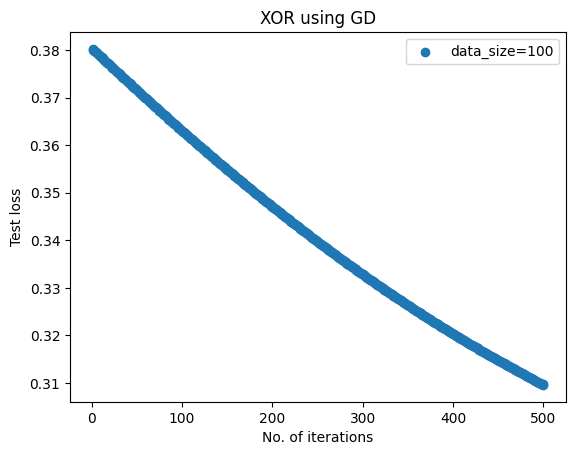

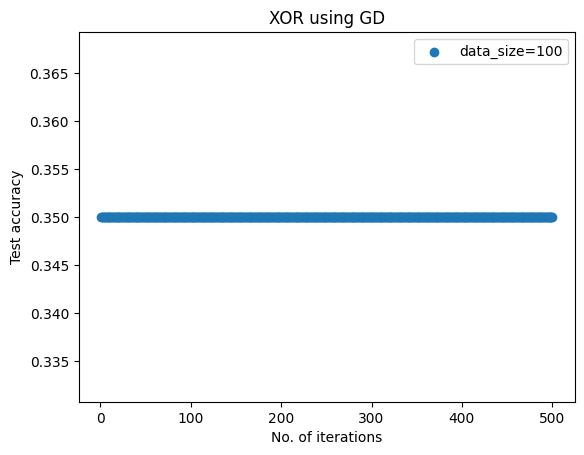

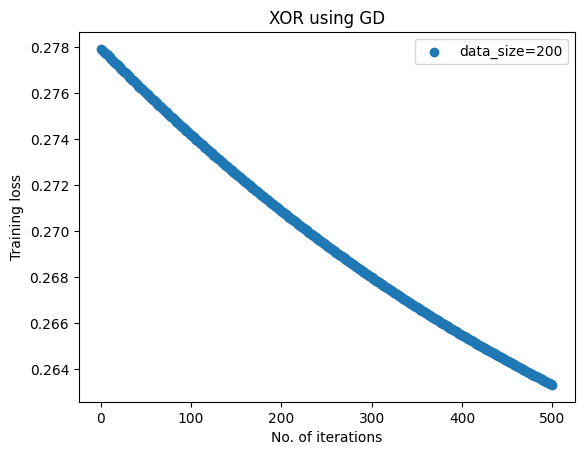

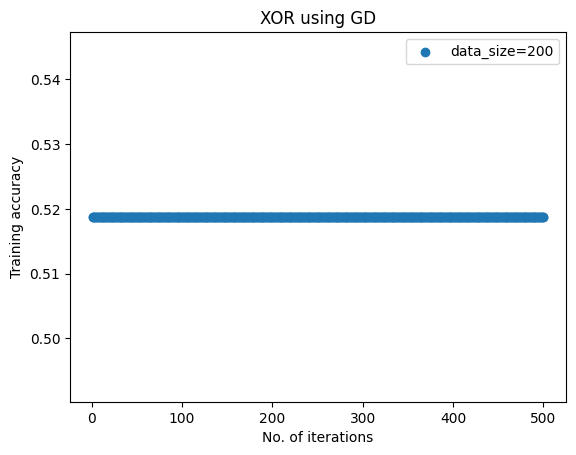

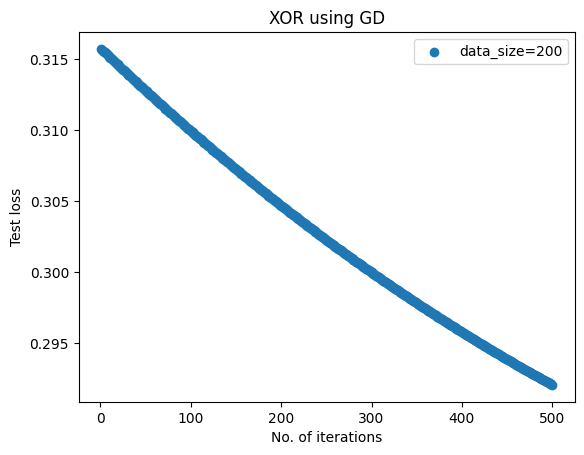

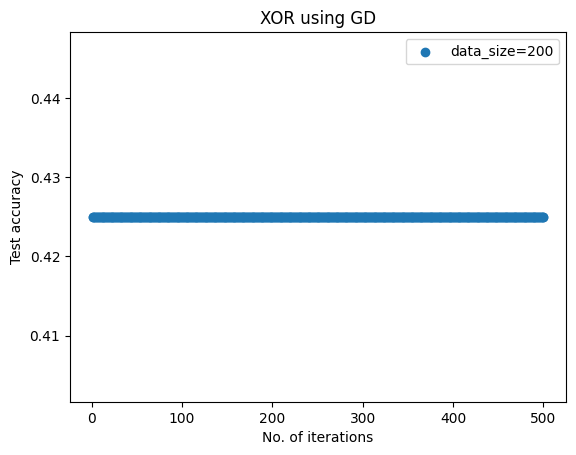

In [725]:
#for GD model
model_GD("XOR",50)
model_GD("XOR",100)
model_GD("XOR",200)

/tmp/ipykernel_5815/668176808.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[k][m]=ann.beta[k][m]-ann.eta*gradsum
/tmp/ipykernel_5815/668176808.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum


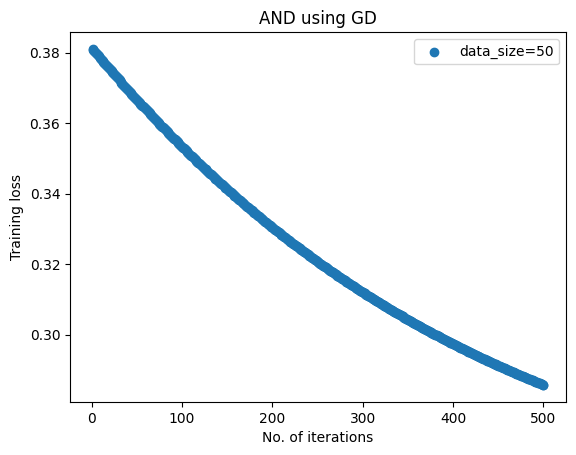

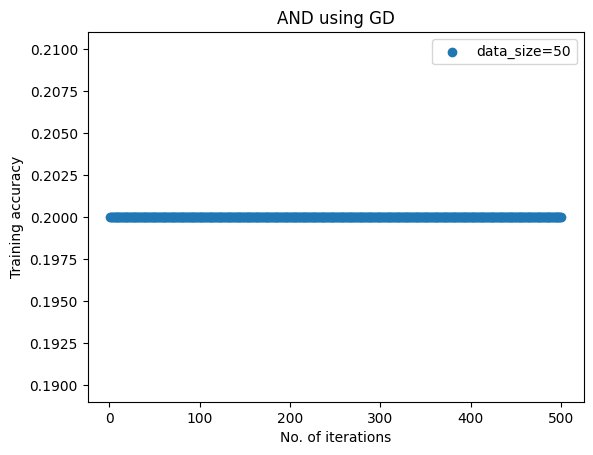

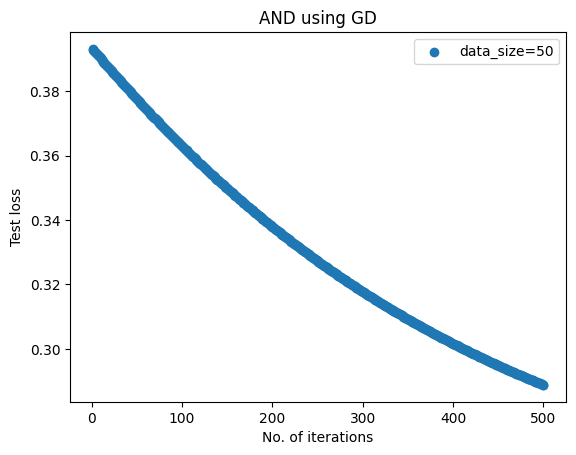

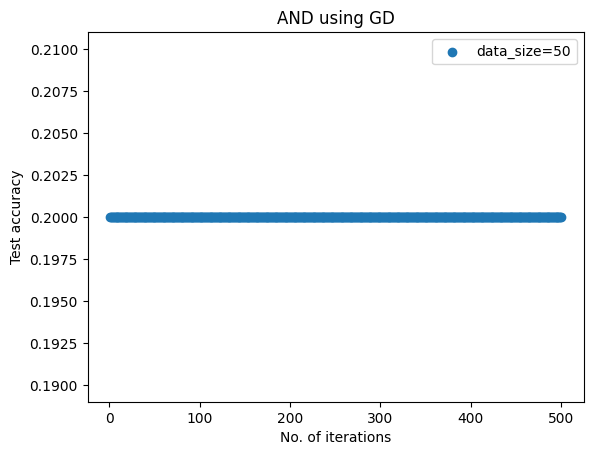

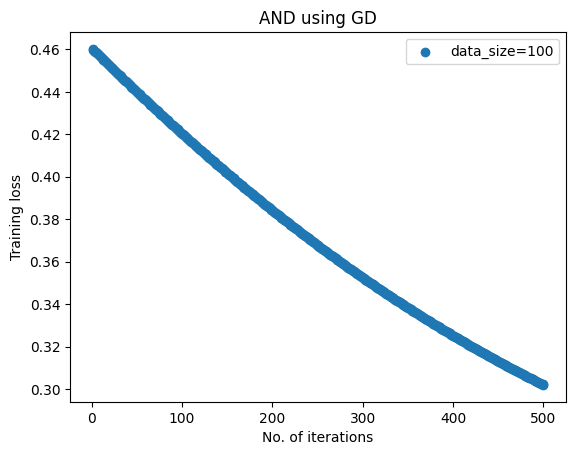

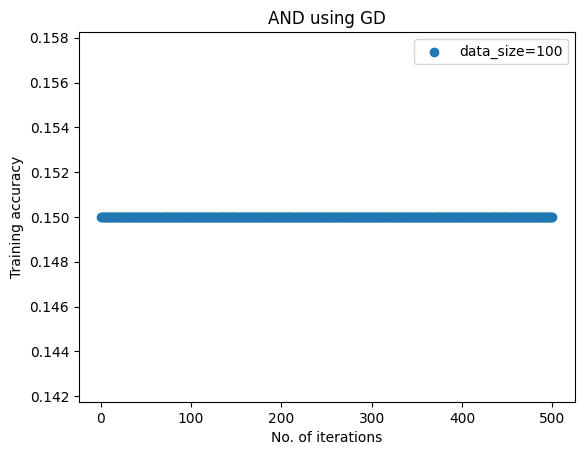

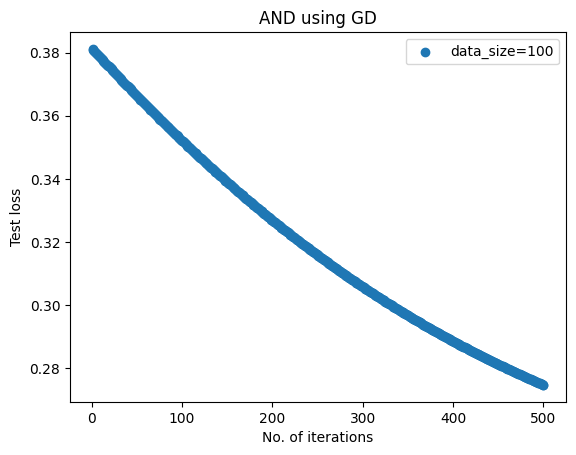

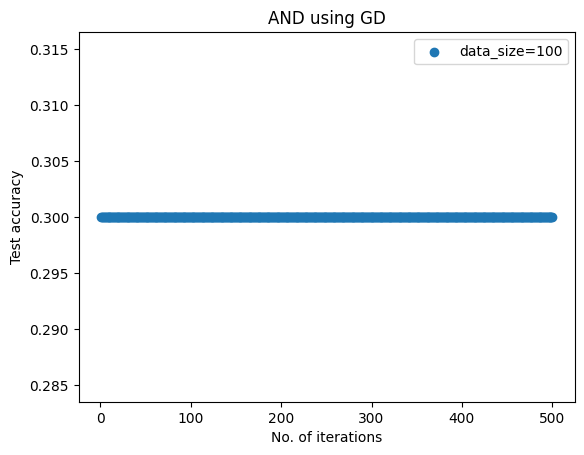

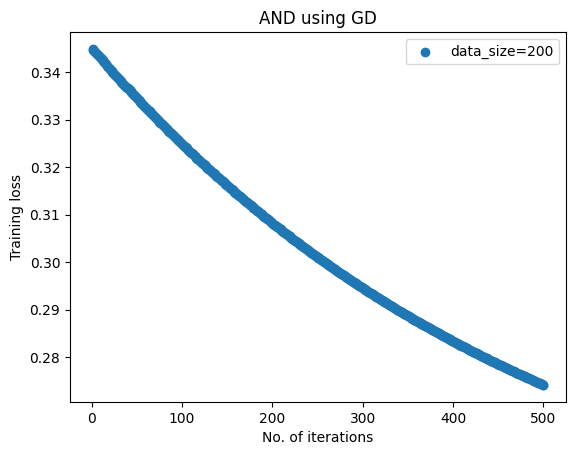

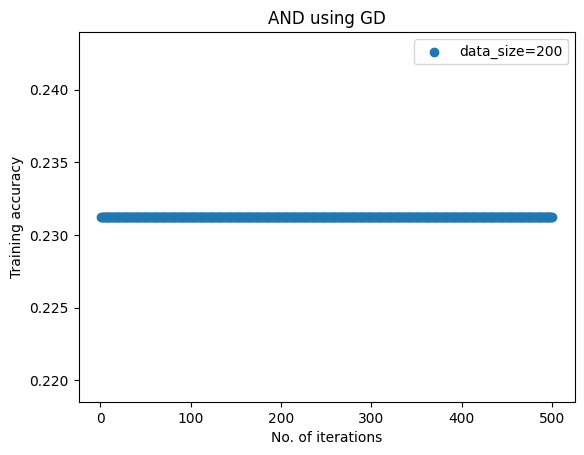

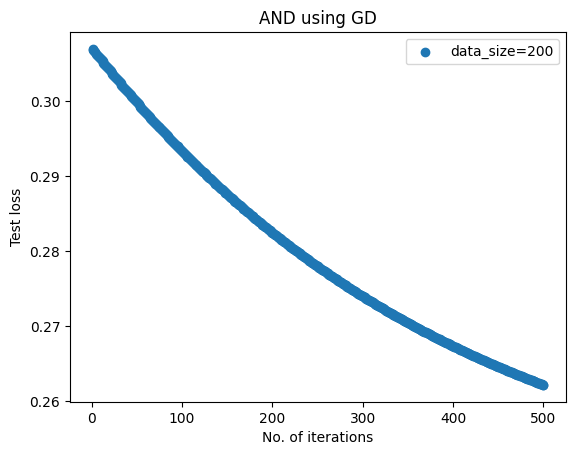

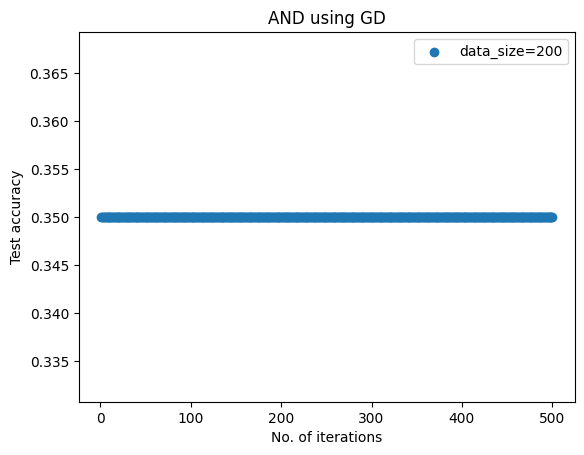

In [726]:
model_GD("AND",50)
model_GD("AND",100)
model_GD("AND",200)


/tmp/ipykernel_5815/668176808.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[k][m]=ann.beta[k][m]-ann.eta*gradsum
/tmp/ipykernel_5815/668176808.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum


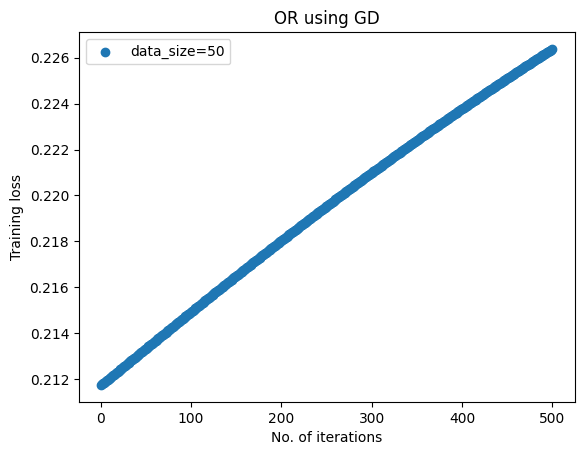

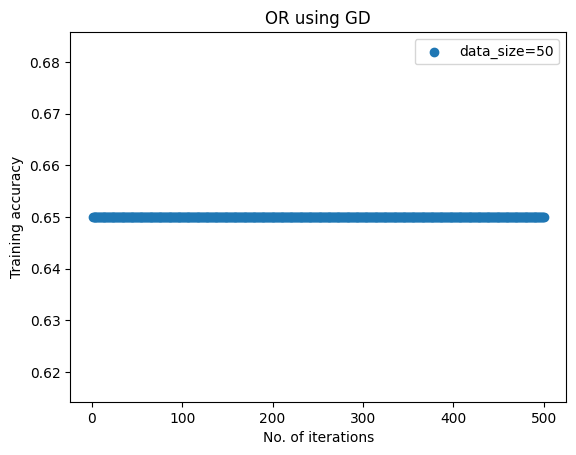

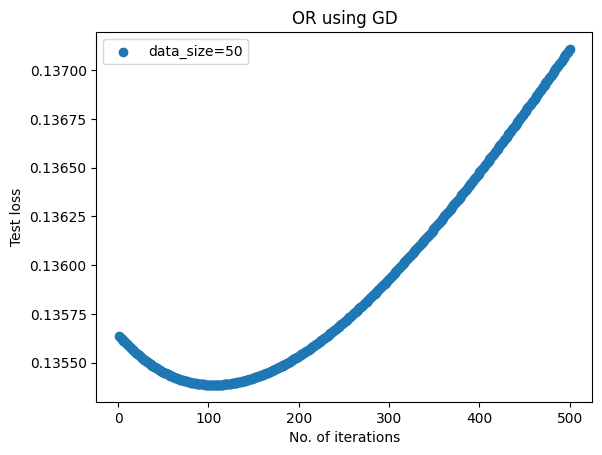

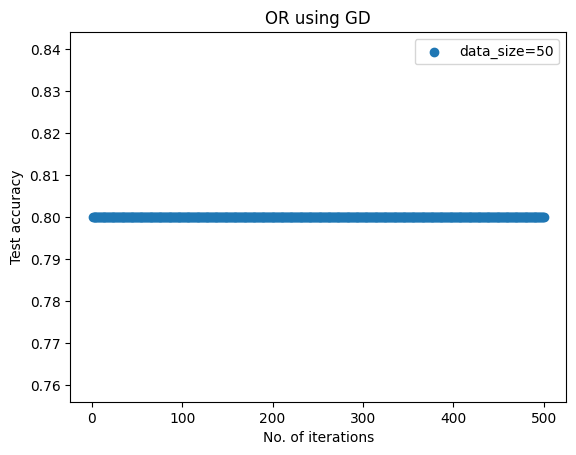

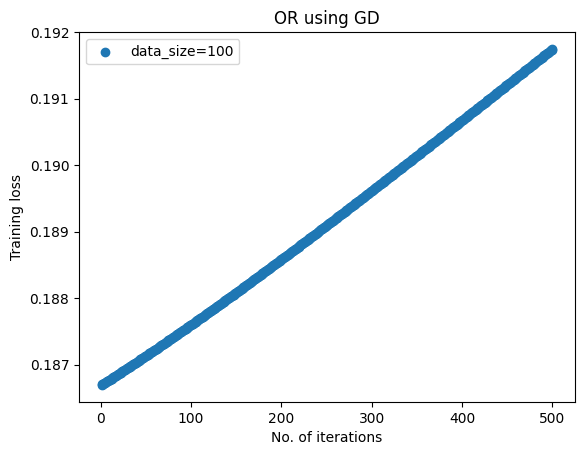

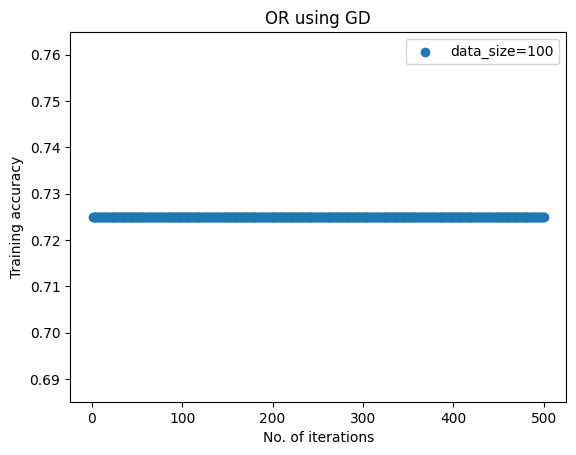

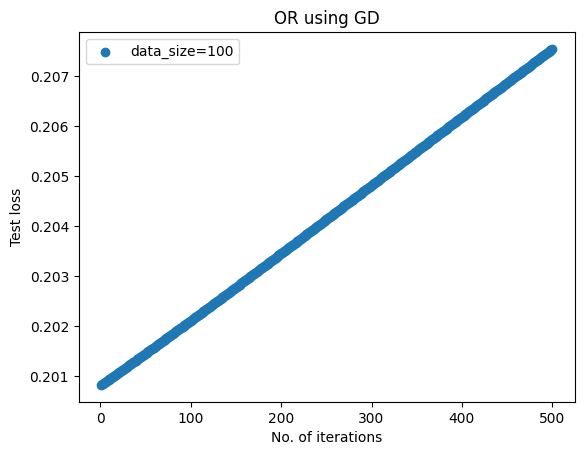

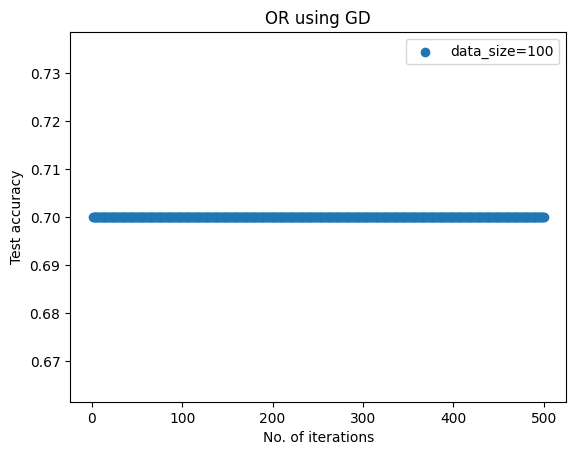

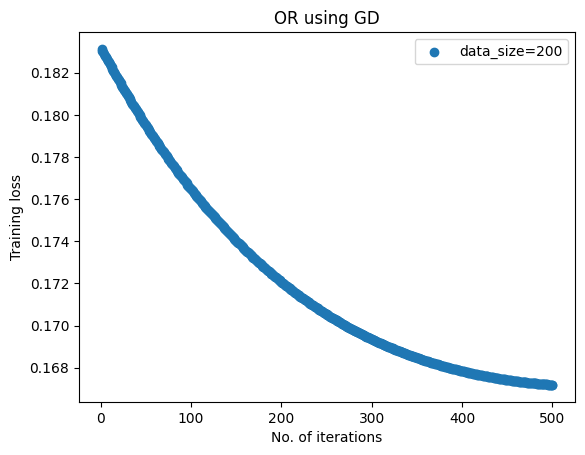

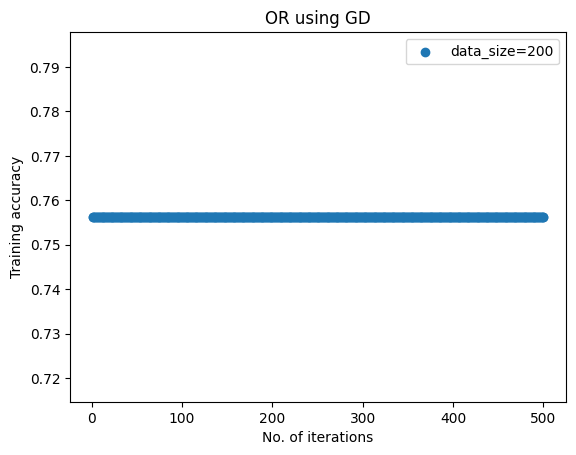

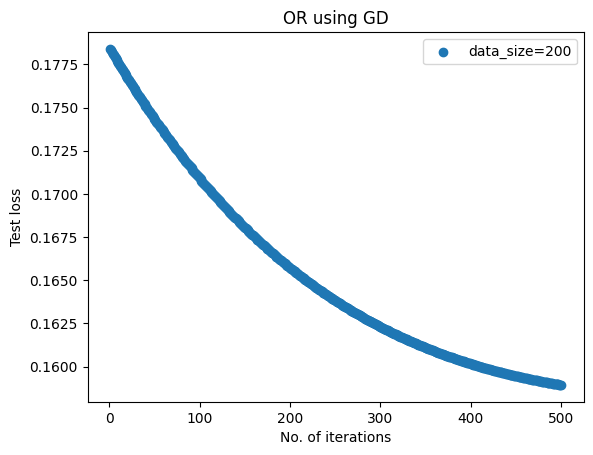

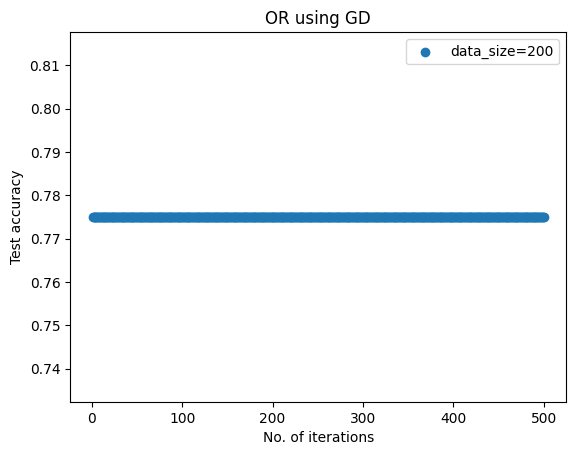

In [727]:
model_GD("OR",50)
model_GD("OR",100)
model_GD("OR",200)

/tmp/ipykernel_5815/668176808.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[k][m]=ann.beta[k][m]-ann.eta*gradsum
/tmp/ipykernel_5815/668176808.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum


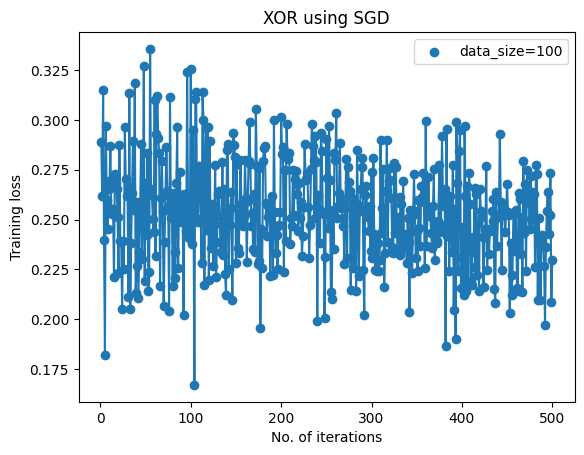

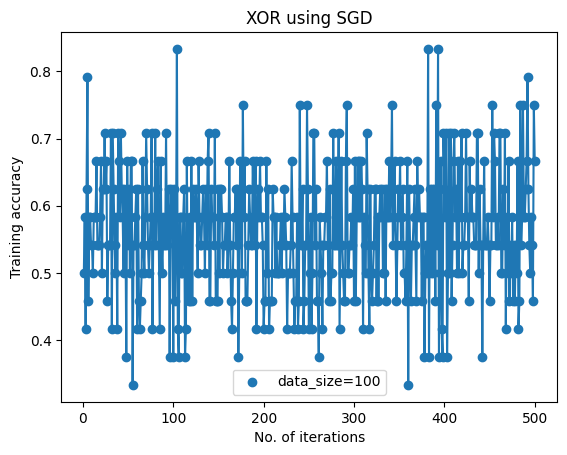

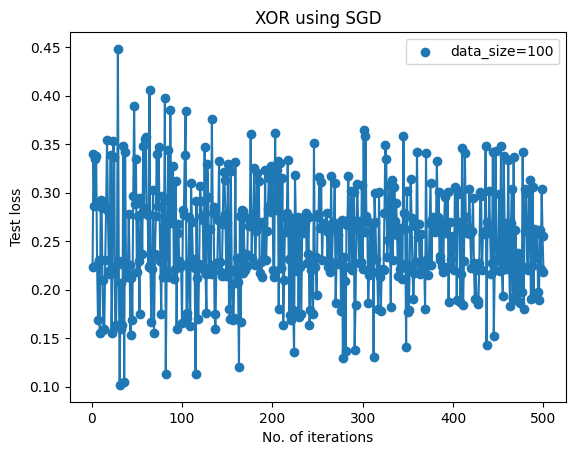

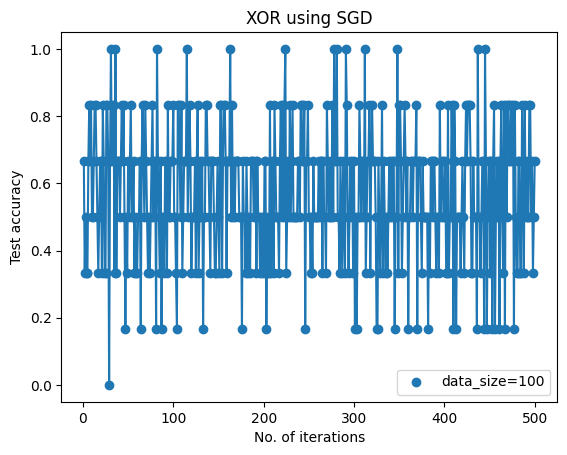

In [728]:
#now for SGD
model_SGD("XOR",100)

/tmp/ipykernel_5815/668176808.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[k][m]=ann.beta[k][m]-ann.eta*gradsum
/tmp/ipykernel_5815/668176808.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum


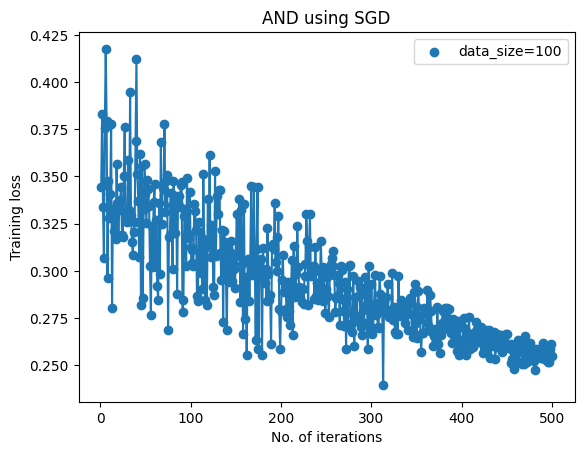

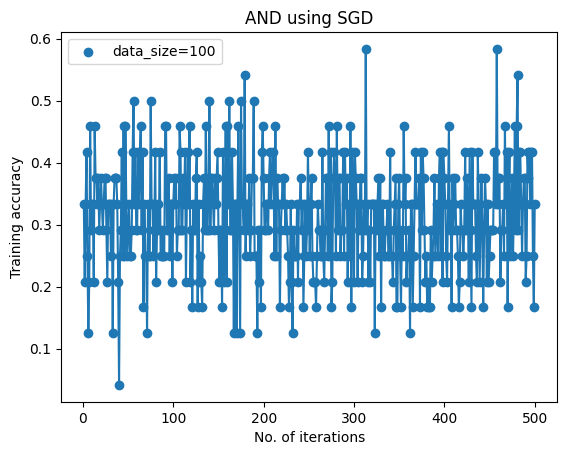

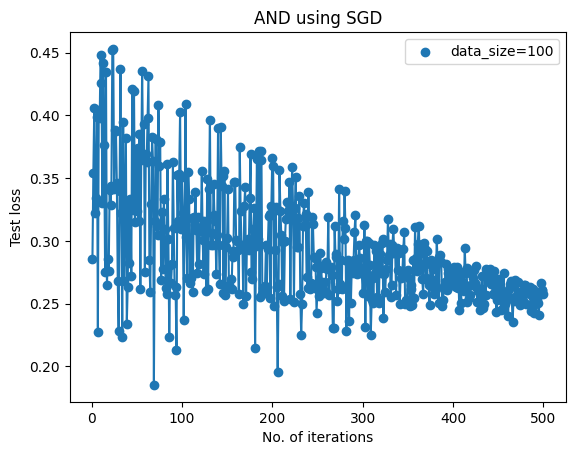

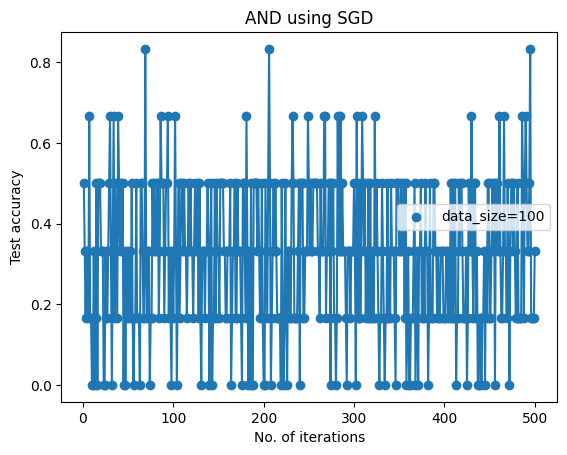

In [729]:
model_SGD("AND",100)

/tmp/ipykernel_5815/668176808.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[k][m]=ann.beta[k][m]-ann.eta*gradsum
/tmp/ipykernel_5815/668176808.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum


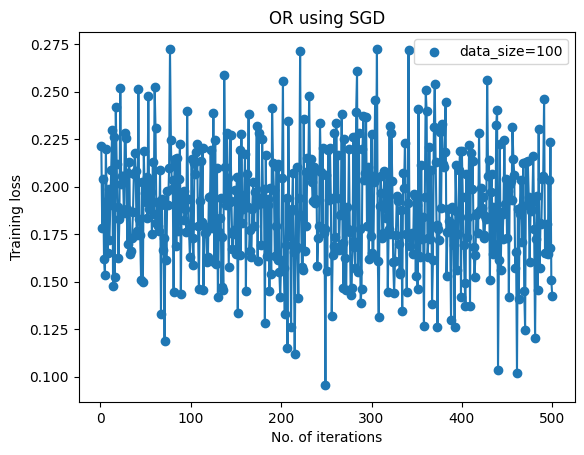

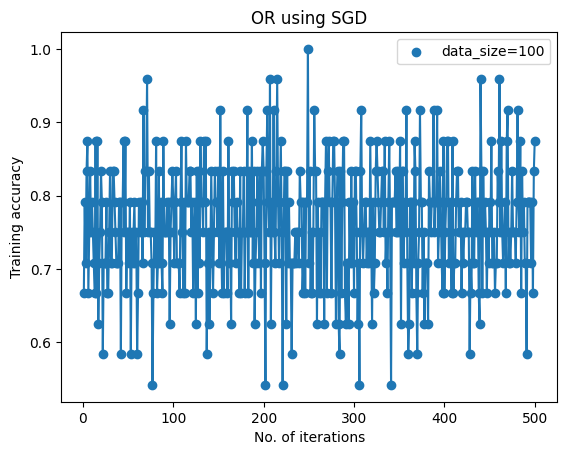

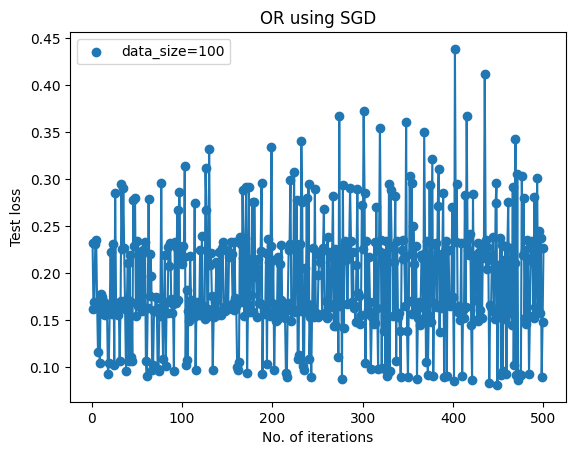

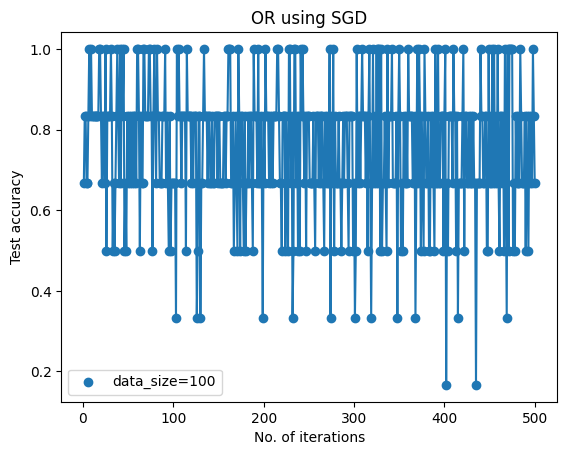

In [730]:
model_SGD("OR",100)